In [1]:
import pandas as pd
import numpy as np
import sys

# Problem definition

Using data from passengers on the Titanic, try to find survival rates based on the characteristics of passengers.

# Data definition

### Data explanation
**survival** : Survival [0 = No, 1 = Yes]

**pclass** :	Ticket class	[1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)]

**sex** :	Sex	

**Age** :	Age in years	

**sibsp** :	# of siblings / spouses aboard the Titanic	

**parch** :	# of parents / children aboard the Titanic	

**ticket** :	Ticket number	

**fare** :	Passenger fare	

**cabin** :	Cabin number	

**embarked** :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
train_f = pd.read_csv("../data/train.csv")
test_f = pd.read_csv("../data/test.csv")
test_a =pd.read_csv("../data/gender_submission.csv")

In [3]:
train_f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_f.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_a.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test_td = pd.concat([test_f, test_a], axis=1)
test_td = test_td.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10]]
titanic_df = pd.concat([train_f, test_td], axis=0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.to_csv("../data/titanic_df.csv")

In [8]:
titanic_df = pd.read_csv("../data/titanic_df.csv")

In [9]:
# Check the summary of your current data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Unnamed: 0     1309 non-null int64
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 133.0+ KB


# Data preprocessing

In fact, there is information that the accident first carried women and the elderly on lifeboats.
Based on this information, we remove features from the data that would not have a significant impact on the survival forecast. 
Delete columns with too many null values and convert women to 0 and men to 1.

In [10]:
del titanic_df["Name"]
del titanic_df["Ticket"]
del titanic_df["Cabin"]
del titanic_df["Embarked"]
del titanic_df["Unnamed: 0"]

In [11]:
titanic_df.loc[titanic_df["Sex"] == "female",["Sex"]] = 0
titanic_df.loc[titanic_df["Sex"] == "male",["Sex"]] = 1
titanic_df = titanic_df.dropna()

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,654.990431,0.399043,2.206699,0.628708,29.851837,0.503349,0.421053,36.686080
std,377.650551,0.489936,0.841542,0.483382,14.389194,0.912471,0.840052,55.732533
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,326.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,662.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.750000
75%,973.000000,1.000000,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,1307.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


* The summary of titanic_df shows that the survival rate is very low at 37.7%.
* Gender also shows that there are more males than females, and the average age group was lower than expected at 30.

# Data Visualization

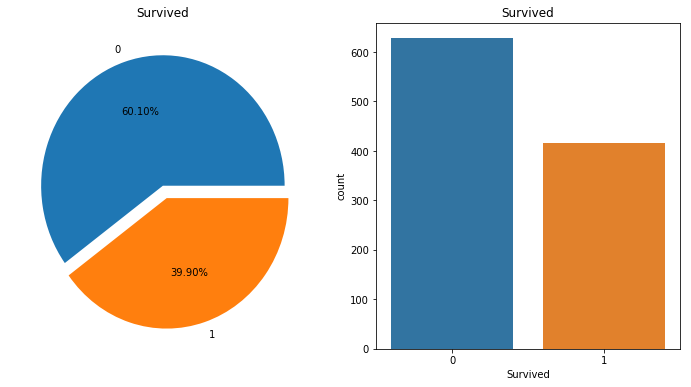

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f,ax=plt.subplots(1,2,figsize=(12,6))

titanic_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* Blue indicates death and orange indicates survivors.

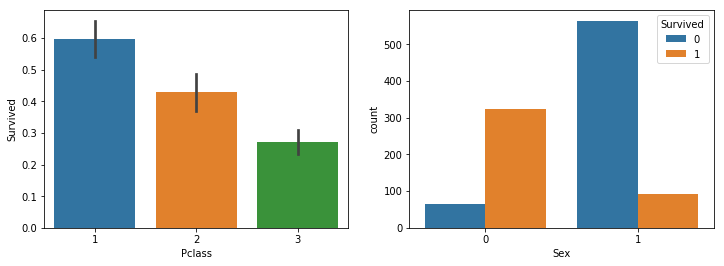

In [15]:
plt.figure(figsize=[12,4])
plt.subplot(121)
sns.barplot('Pclass', 'Survived', data=titanic_df)
plt.subplot(122)
sns.countplot('Sex',hue='Survived',data=titanic_df)
plt.show()

* Comparing the survival rate by seat rating, one can see that the expensive seat has higher survival rate.

* If you look at the graph on the right, it shows female deaths, female survivors, male deaths, and male survivors from the left. And we can see survival rate of female  is much higher than male.

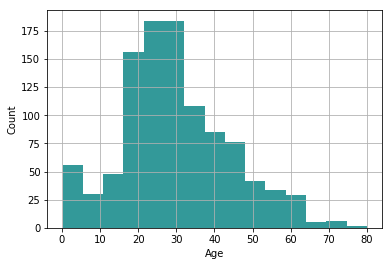

In [16]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

* The age distribution of passengers shows that they are concentrated in their 20s and 30s.

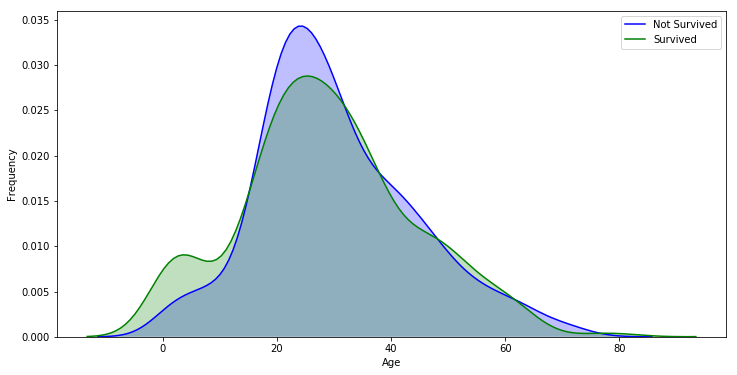

In [17]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 0) & (titanic_df["Age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 1) & (titanic_df["Age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* The most important part of this graph comparing survival rate and age is the green section, which represents a high percentage of survivors, and the purple section, which represents a high percentage of deaths.

* Age under 17 group have a very high survival rate compared to other age groups.

* Age between 17~35 group have a very high death rate compared to other age groups.

#### By analyzing the overall data, one can see that the younger , female and more expensive class of seats have higher survival rate. If we don't think about class of seats, people tried to protect the weak first in the accident.

# Data Division

In [18]:
# The train_test_split of sklearn makes it easy to divide data into a single line.
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic_df, test_size=0.2)

In [19]:
import pickle
with open('../data/fifa_train.pkl', 'wb') as train_df:
    pickle.dump(train, train_df)
    
with open('../data/fifa_test.pkl', 'wb') as test_df:
    pickle.dump(test, test_df)

In [20]:
with open('../data/fifa_train.pkl', 'rb') as train_df:
    train = pickle.load(train_df)
    
with open('../data/fifa_test.pkl', 'rb') as test_df:
    test = pickle.load(test_df)

# Setting Optimal Parameters for a Model

We can deduce these values(max_depth, min_samples_split,mins_samples_leaf, random_state) through repetition.

In [21]:
from sklearn import tree
from sklearn import preprocessing

In [22]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train[['Survived']]

X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_test = test[['Survived']]

In [23]:
depth = list(range(1,100,5))
sample_split = list(range(2,100,5))
sample_leaf = list(range(2,100,5))
random_state = list(range(1,100,5))
clf_list = []
for i in depth:
    for j in sample_split:
        for k in sample_leaf:
            for l in random_state:
                clf_list.append(tree.DecisionTreeClassifier(max_depth=i, 
                                  min_samples_split=j,
                                  min_samples_leaf=k, 
                                  random_state=l).fit(X_train, y_train))

In [24]:
clf_list[-5:]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0, presort=False, random_state=76,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0, presort=False, random_state=81,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score_list = {}
for clf in clf_list:
    pred = clf.predict(X_test)
    accuracy_score_list[clf] = accuracy_score(y_test, pred)

In [26]:
len(accuracy_score_list)

160000

Choose the optimal clf with the highest accuracy among the 160,000 clf values.

In [27]:
max_accuracy = max(list(accuracy_score_list.values()))
best_clf = list(accuracy_score_list.keys())[list(accuracy_score_list.values()).index(max_accuracy)]
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=52,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# Model test

In [28]:
pred = best_clf.predict(X_test)

Check the accuracy of the model prediction.

In [29]:
print("accuracy : " + str( accuracy_score(y_test, pred)) )

accuracy : 0.8325358851674641


Compare the actual and predicted values. 

In [30]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test["Survived"]}) 
comparison

,prediction,ground_truth
167,0,0
900,0,0
345,1,1
369,1,1
645,0,1
69,0,0
463,0,0
943,1,1
1084,0,0
684,0,0


# Decision tree Visualization

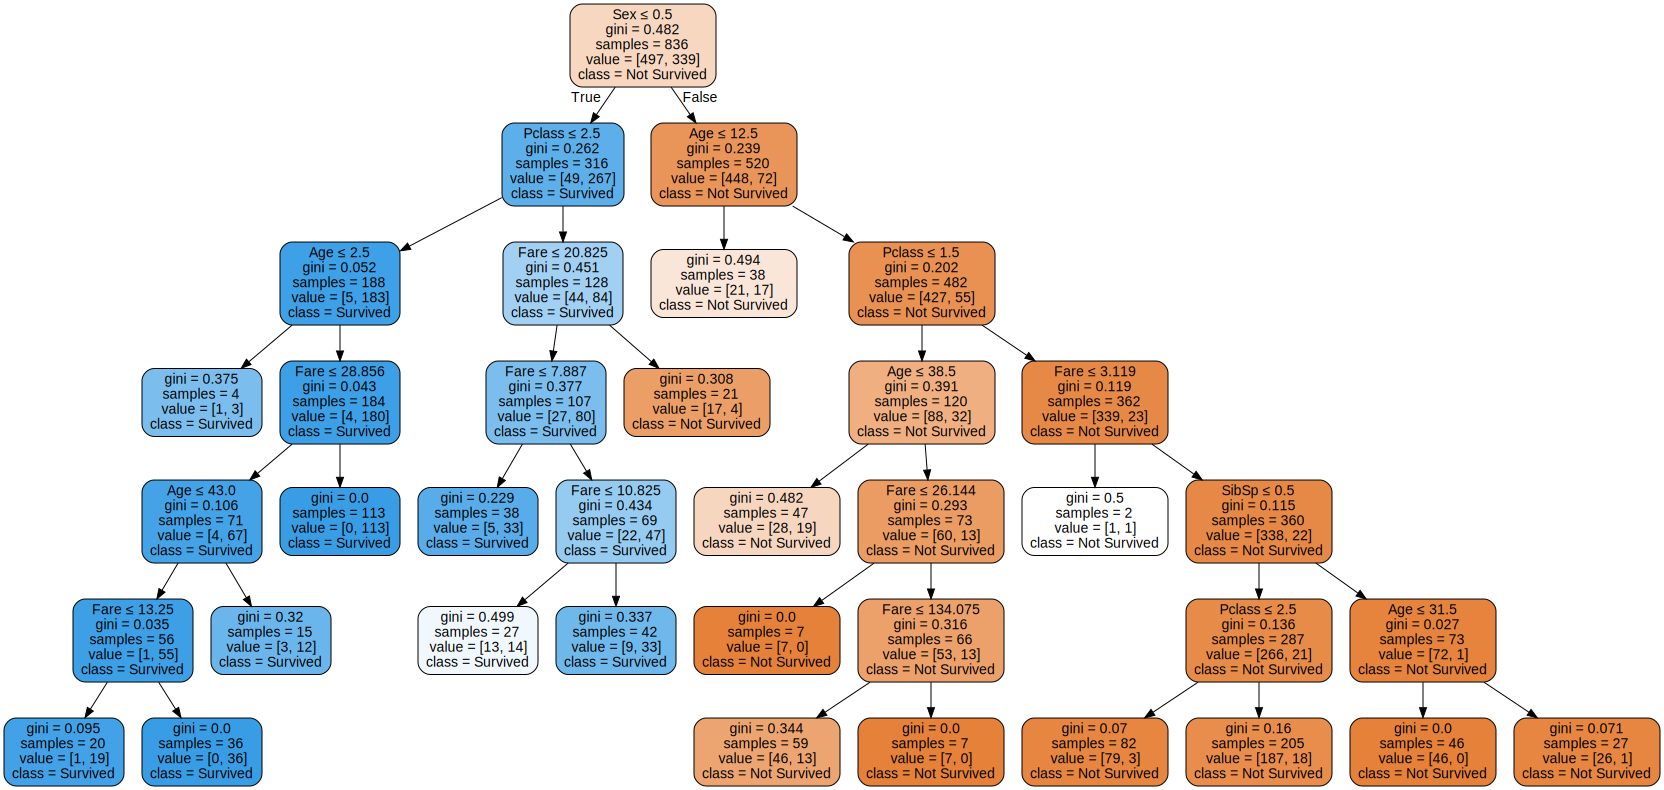

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
dot_data = tree.export_graphviz(best_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic survived")

dot_data = tree.export_graphviz(best_clf, out_file=None, 
                         feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                         class_names=['Not Survived', 'Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Setting Optimal Parameters for Randomforest

In [55]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [56]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
estimators = list(range(1,200))
clf_list2 = []
for i in estimators:
    clf_list2.append(RandomForestClassifier(n_estimators=i).fit(X_train, y_train))

In [57]:
clf_list2[-5:]

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=195, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_node

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score_list2 = {}
for clf in clf_list2:
    pred2 = clf.predict(X_test)
    accuracy_score_list2[clf] = accuracy_score(y_test, pred2)

In [59]:
len(accuracy_score_list2)

199

Choose the optimal clf with the highest accuracy among the 199 clf values.

In [60]:
max_accuracy2 = max(list(accuracy_score_list2.values()))
best_clf2 = list(accuracy_score_list2.keys())[list(accuracy_score_list2.values()).index(max_accuracy2)]
best_clf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Randomforest Test

In [61]:
pred2 = best_clf2.predict(X_test)

Check the accuracy of the model prediction.

In [62]:
print("accuracy : " + str( accuracy_score(y_test, pred2)) )

accuracy : 0.8373205741626795


Compare the actual and predicted values.

In [63]:
comparison2 = pd.DataFrame({'prediction':pred2, 'ground_truth':y_test["Survived"]}) 
comparison2

,prediction,ground_truth
167,0,0
900,0,0
345,1,1
369,1,1
645,1,1
69,0,0
463,0,0
943,1,1
1084,0,0
684,0,0


# Cross_Validation

In [73]:
def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    return cv_scores

In [74]:
dt_cv_scores = cross_validation(best_clf, X_test, y_test)

In [75]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
rf_cv_scores = cross_validation(best_clf2, X_test, y_test)

# Randomforest VS Decision tree

In [76]:
cv_list = [    
            ['random_forest',rf_cv_scores],
            ['decision_tree',dt_cv_scores],
          ]
df = pd.DataFrame.from_items(cv_list)

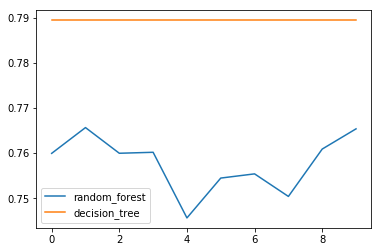

In [77]:
df.plot()

# Accuracy of Decision Tree

In [78]:
np.mean(dt_cv_scores)

0.7894372294372294

# Accuracy of Randomforest

In [79]:
np.mean(rf_cv_scores)

0.7577835497835498

# conclusion

#### In fact, we need to get better results from the random forest model..

#### However, in this report, the two models were obtained repeatedly to improve the predictability of test data while adjusting all the detailed figures.

#### In short, the above result is that there is a probability of being overfit.

#### Therefore, if you do not adjust the detailed figure and set it to the auto, results are as shown in the graph below.


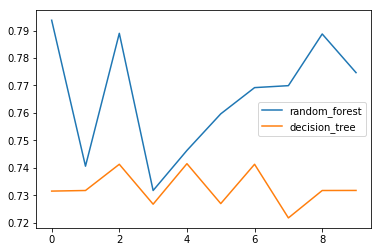

In [72]:
cv_list = [    
            ['random_forest',cross_validation(RandomForestClassifier(), X_test, y_test)],
            ['decision_tree',cross_validation(tree.DecisionTreeClassifier(), X_test, y_test)],
          ]
df = pd.DataFrame.from_items(cv_list)
df.plot()

# etc..

The autosklearn package is said to be a way to obtain appropriate parameter values for different models. I would like to try autosklearn in the next report.